# **Прогнозирование продолжительности жизни населения стран мира**

## EDA

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")
print(f"Данные скачаны в: {path}")

csv_file = os.path.join(path, "Life Expectancy Data.csv")
df = pd.read_csv(csv_file)

Данные скачаны в: /Users/dobin/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1


In [70]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [71]:
df.shape

(2938, 22)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Переименуем столбцы для удобства работы с данными

In [73]:
df.columns = [
    'country', 'year', 'status', 'life_expect', 'adult_mort', 'infant_deaths', 'alcohol', 'pct_expend',
    'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expend', 'diphtheria',
    'hiv_aids', 'gdp', 'population', 'thin_1_19', 'thin_5_9', 'income_composition', 'schooling'
]

In [74]:
df.describe()

,year,life_expect,adult_mort,infant_deaths,alcohol,pct_expend,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expend,diphtheria,hiv_aids,gdp,population,thin_1_19,thin_5_9,income_composition,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [75]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

population            652
hepatitis_b           553
gdp                   448
total_expend          226
alcohol               194
income_composition    167
schooling             163
bmi                    34
thin_1_19              34
thin_5_9               34
polio                  19
diphtheria             19
life_expect            10
adult_mort             10
dtype: int64

Посмотрим на категориальные переменные

In [76]:
print("Количество уникальных стран:", df['country'].nunique())

Количество уникальных стран: 193


In [77]:
df['status'].value_counts()

status
Developing    2426
Developed      512
Name: count, dtype: int64

## Визуализации

In [78]:
sns.set_palette("pastel")

Посмотрим на распределение целевой переменной: `life_expect`

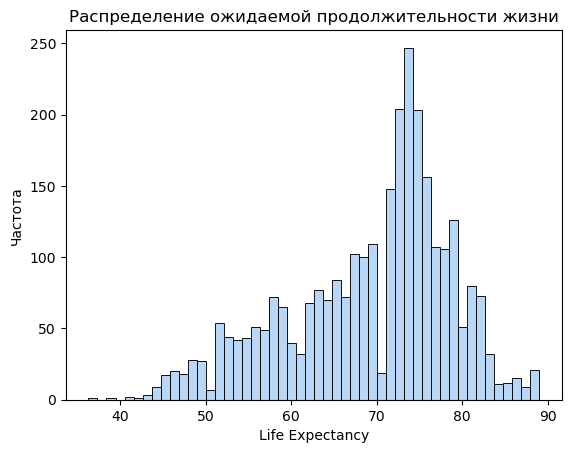

In [79]:
sns.histplot(df['life_expect'], bins=50)
plt.title('Распределение ожидаемой продолжительности жизни')
plt.xlabel('Life Expectancy')
plt.ylabel('Частота')
plt.show()

Распределение похоже на нормальное со смещением влево, это говорит о том, что большинство стран имеют умеренно высокую продолжительность жизни, однако существует хвост из развивающихся стран с низкими значениями. Для большинства моделей целевая переменная уже хорошо распределена и **не требует трансформации**.

Сравним распределения по ключевому категориальному признаку `status`

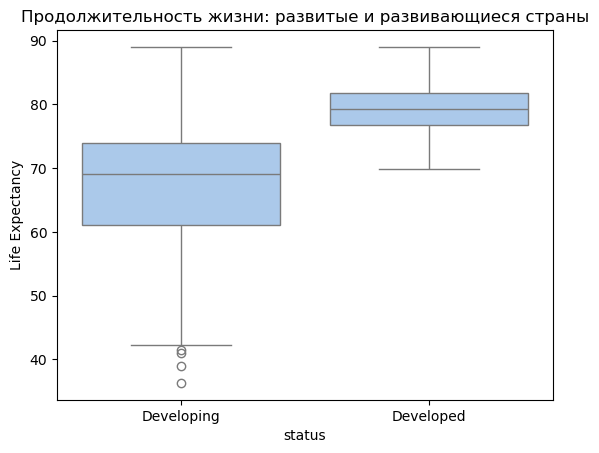

In [80]:
sns.boxplot(x='status', y='life_expect', data=df)
plt.title('Продолжительность жизни: развитые и развивающиеся страны')
plt.ylabel('Life Expectancy')
plt.show()

Развитые страны имеют значительно более высокую продолжительность жизни, статус страны - значимый категориальный предиктор

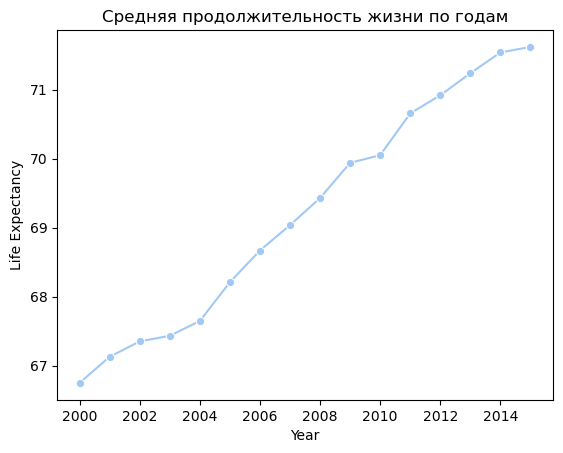

In [81]:
avg_by_year = df.groupby('year')['life_expect'].mean().reset_index()

sns.lineplot(x='year', y='life_expect', data=avg_by_year, marker='o')
plt.title('Средняя продолжительность жизни по годам')
plt.ylabel('Life Expectancy')
plt.xlabel('Year')
plt.show()

Средняя продолжительность жизни показывает устойчивый восходящий линейный тренд роста, можем использовать год как числовой признак в модели

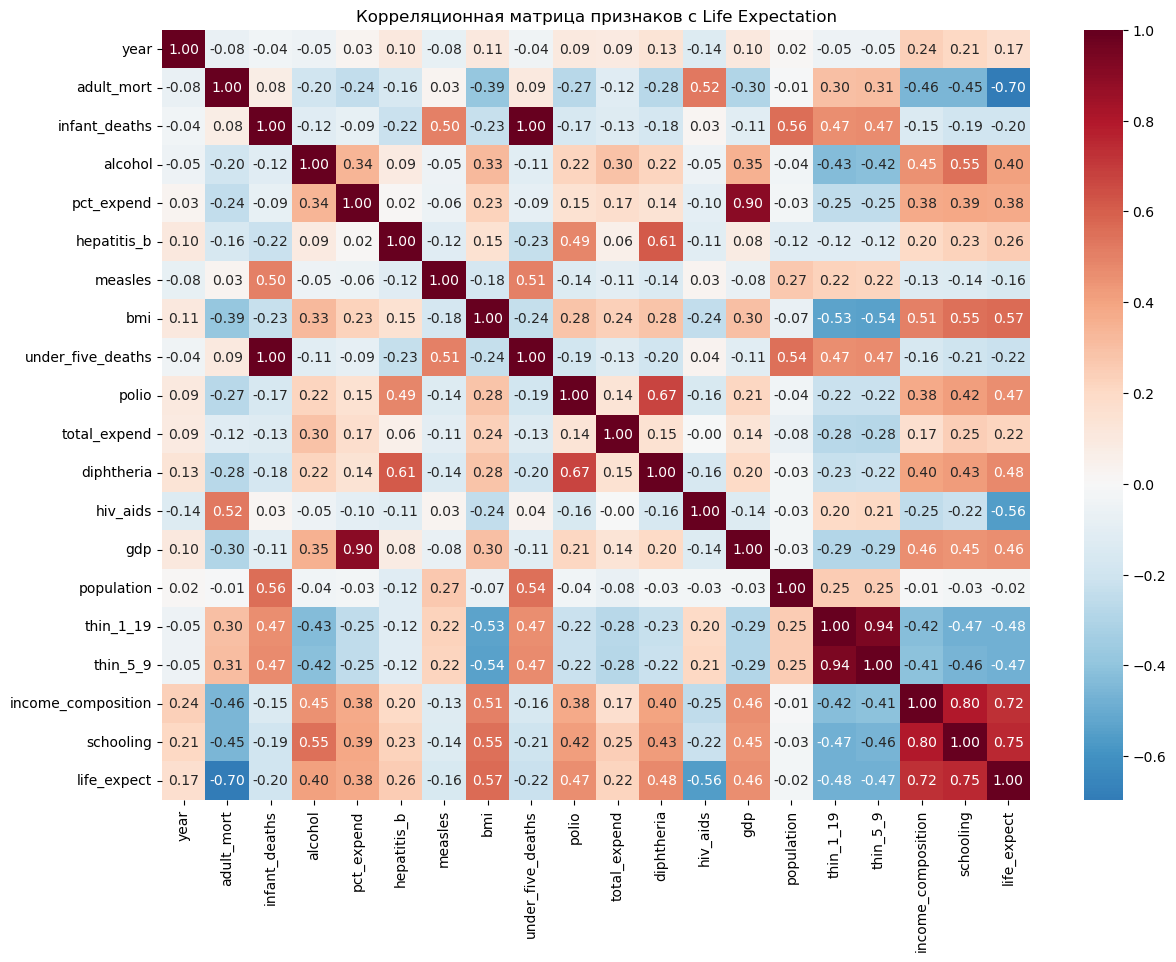

Топ положительных корреляций
schooling             0.751975
income_composition    0.724776
bmi                   0.567694
diphtheria            0.479495
polio                 0.465556
gdp                   0.461455
alcohol               0.404877
Name: life_expect, dtype: float64

Топ отрицательных корреляций
adult_mort   -0.696359
hiv_aids     -0.556556
thin_1_19    -0.477183
thin_5_9     -0.471584
Name: life_expect, dtype: float64


In [82]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('life_expect')

corr_matrix = df[num_cols + ['life_expect']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="RdBu_r", center=0, annot=True, fmt=".2f")
plt.title('Корреляционная матрица признаков с Life Expectation')
plt.show()

target_corr = corr_matrix['life_expect'].drop('life_expect')

positive_corr = target_corr[target_corr >= 0.4].sort_values(ascending=False)

negative_corr = target_corr[target_corr <= -0.4].sort_values(ascending=True)

print("Топ положительных корреляций")
print(positive_corr)

print("\nТоп отрицательных корреляций")
print(negative_corr)

Продолжительность жизни имеет сильную положительную связь с признаками, отражающими уровень развития и благополучия:
- `schooling` (уровень образования)
- `income_composition` (индекс дохода)
- `gdp` (ВВП на душу населения)

Сильно отрицательная связь наблюдается с признаками, отражающими смертность и болезни:
- `adult_mort` (смертности взрослого населения)
- `hiv_aids` (распространенность ВИЧ)
- `thin_1_19` и `thin_5_9` (истощение детского населения)

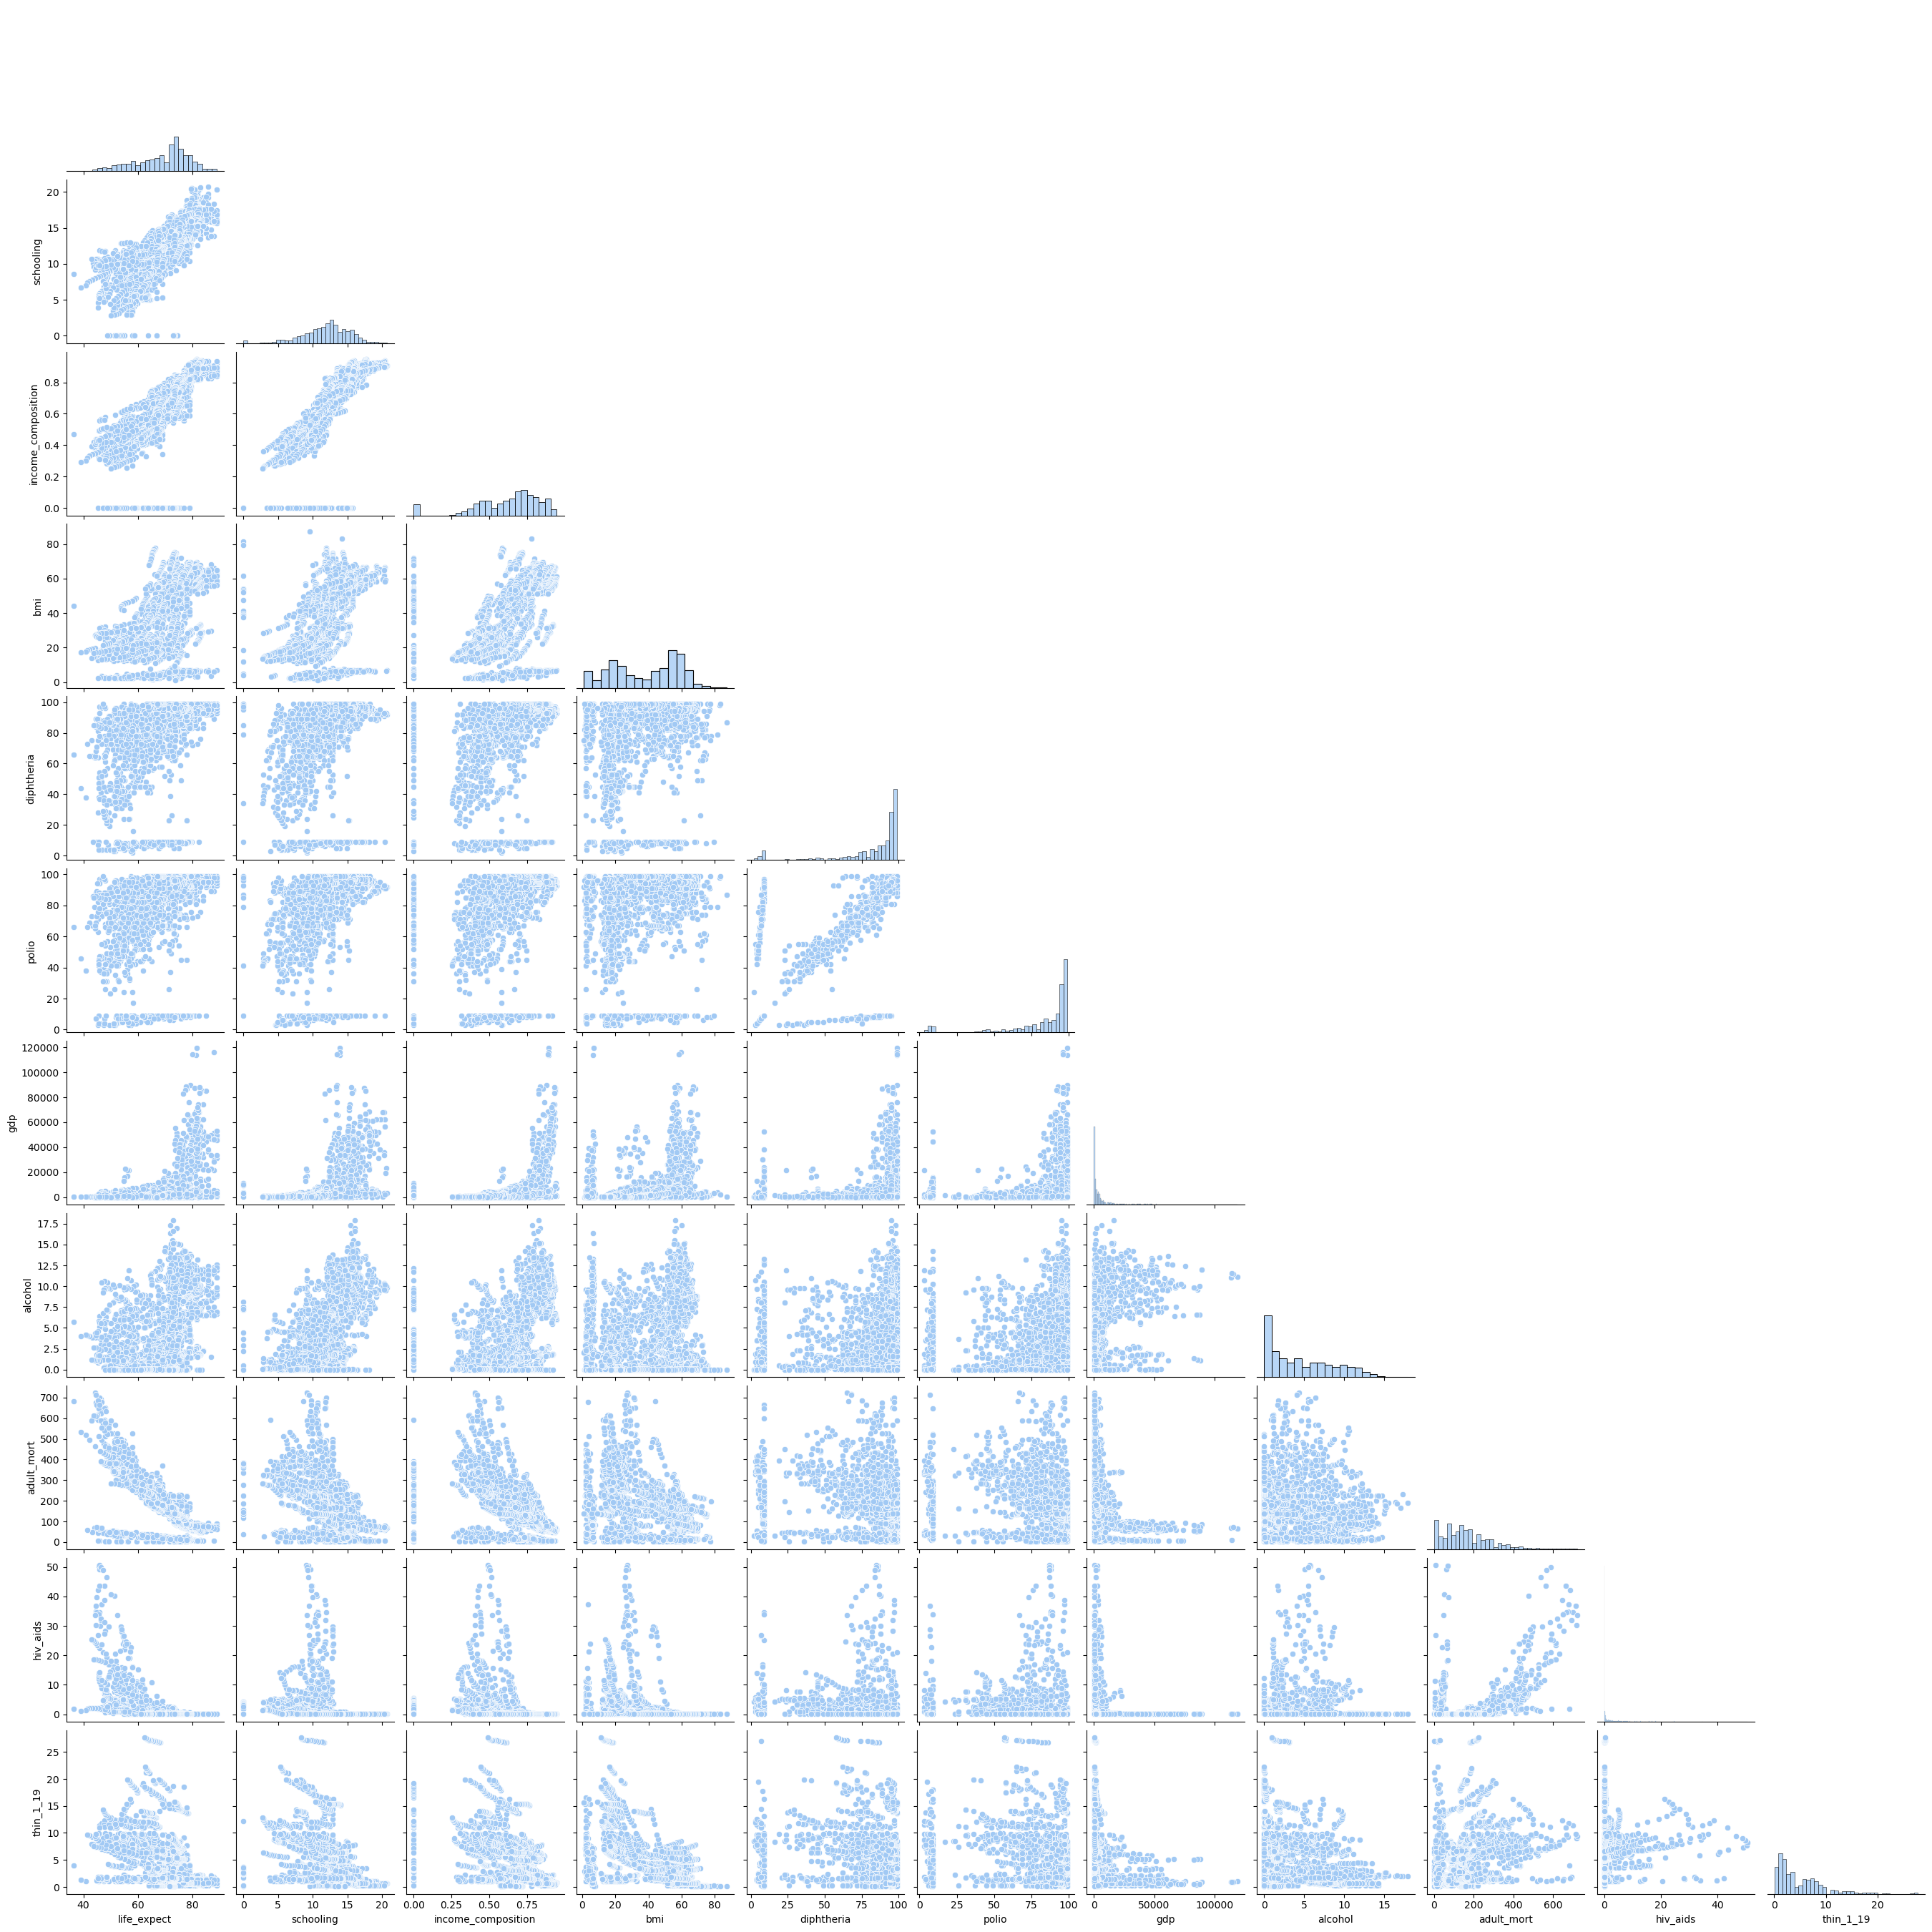

In [83]:
top_features = [
    'life_expect', 'schooling', 'income_composition',
    'bmi', 'diphtheria', 'polio', 'gdp', 'alcohol',
    'adult_mort', 'hiv_aids', 'thin_1_19'
]

sns.pairplot(df[top_features], corner=True)
plt.show()

In [84]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    if col in ['gdp', 'total_expend', 'alcohol', 'income_composition']:
        df[col] = df.groupby('year')[col].transform(lambda x: x.fillna(x.median()))
    else:
        df[col] = df.groupby('country')[col].transform(lambda x: x.fillna(x.median()))
df = df.fillna(df.median(numeric_only=True))

df['is_developed'] = df['status'].map({'Developing': 0, 'Developed': 1})


print("Размер после препроцессинга:", df.shape)
print("Пропуски после обработки:", df.isnull().sum().sum())

Размер после препроцессинга: (2938, 23)
Пропуски после обработки: 0


## Анализ пропущенных значений


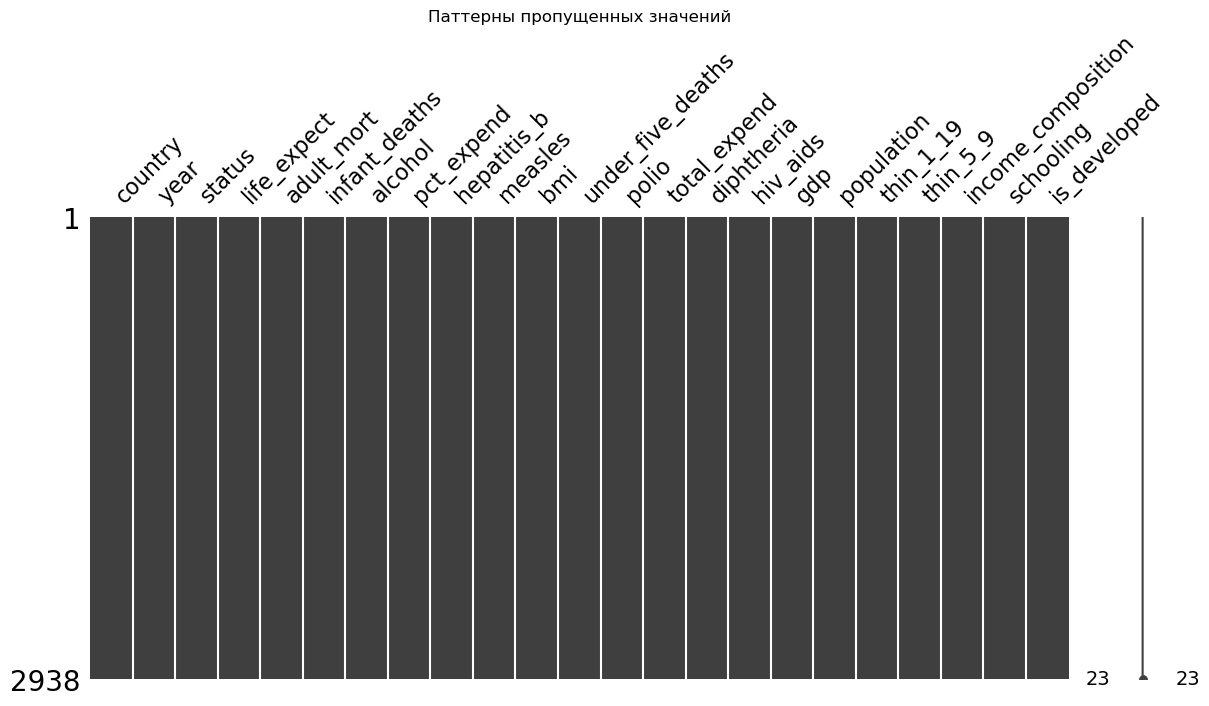


Статистика пропущенных значений:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percent]
Index: []


In [ ]:
import missingno as msno

try:
    msno.matrix(df, figsize=(14, 6))
    plt.title('Паттерны пропущенных значений')
    plt.show()
except:
    plt.figure(figsize=(14, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Карта пропущенных значений (желтый = пропуски)')
    plt.show()

missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percent': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Percent', ascending=False)
print("\nСтатистика пропущенных значений:")
print(missing_stats.to_string(index=False))


## Feature preprocessing

Удалим наблюдения с пустыми значениями продолжительности жизни, также удалим сильно коррелирующие признаки. Заполним пропуски по принципу: для социально-экономических признаков - медиана по году, для биомедицинских и демографических показателей - медиана по стране.

Разберемся с категориальными переменными. Для статуса страны создадим новый признак через one-hot encoding. Так как стран слишком много (193) для one-hot encoding, разобьем их по континентам и применим one-hot encoding к ним. Удалим ненужные признаки.

Для скошенных распределений применим логарифмирование.

In [86]:
df = df.dropna(subset=['life_expect'])
df = df.drop(columns=['thin_5_9', 'under_five_deaths', 'schooling', 'pct_expend'])

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    if col in ['gdp', 'total_expend', 'alcohol', 'income_composition']:
        df[col] = df.groupby('year')[col].transform(lambda x: x.fillna(x.median()))
    else:
        df[col] = df.groupby('country')[col].transform(lambda x: x.fillna(x.median()))
df = df.fillna(df.median(numeric_only=True))

df['is_developed'] = df['status'].map({'Developing': 0, 'Developed': 1})

print("Размер после препроцессинга:", df.shape)
print("Пропуски после обработки:", df.isnull().sum().sum())

Размер после препроцессинга: (2938, 19)
Пропуски после обработки: 0


Масштабируем данные

In [88]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('life_expect')

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])